## Chapter 04 Low-pass Filter

#### 4.1

In [1]:

import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import signal

In [19]:
from data_loader import load_tokyo_temp
y, m, tokyo = load_tokyo_temp()
tokyo = tokyo[(1990 <= y)*(y <=2019)]
m = m[(1990 <= y)*(y <=2019)]
y = y[(1990 <= y)*(y <=2019)]


tokyoc = np.zeros([12])

for mm in range(1, 13):
    tokyoc[mm-1] = np.nanmean(tokyo[m==mm], 0)
    
tokyoa = np.zeros(tokyo.shape)

for yy in range(1990, 2020):
    for mm in range(1, 13):
        tokyoa[(y==yy)*(m==mm)] = tokyo[(y==yy)*(m==mm)] - tokyoc[mm-1]
tokyoa = signal.detrend(tokyoa)


In [20]:
def running_mean(time_series, wn):
    b = np.ones(wn)/wn
    time_series_r = np.convolve(time_series, b, mode="same")
    n_conv = math.ceil(wn/2)
    time_series_r[0] = time_series_r[0] * wn/n_conv
    for i in range(1, n_conv):
        time_series_r[i] = time_series_r[i] * wn/(i+n_conv)
        time_series_r[-i] = time_series_r[-i] * wn/(i+n_conv-(wn%2))
    return time_series_r
    
def plot_2_mon_time(time_series1, time_series2, lower=-3, upper=3, init_year=1990, fin_year=2019):
    mon = np.arange(init_year, fin_year+1, 1/12)
    plt.figure;
    plt.plot(mon, time_series1, 'b--')
    plt.plot(mon, time_series2, 'r')
    plt.plot(mon, 0*time_series1, 'k')
    plt.xlim(init_year, fin_year)
    plt.ylim(lower, upper)
    plt.show()


### 4.2 Running Means & Low-pass filter

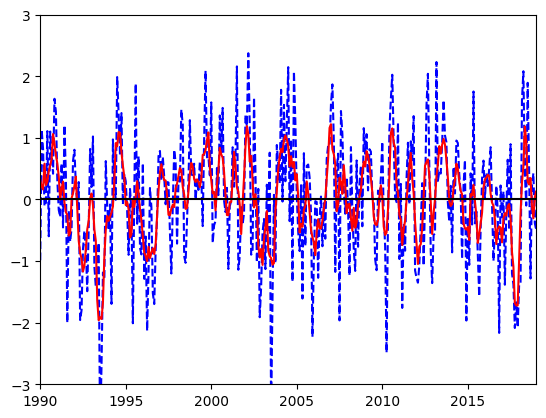

In [21]:
tokyoa_r5 = running_mean(tokyoa, 5)
plot_2_mon_time(tokyoa, tokyoa_r5)

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1095/2083711257.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Power($°C^2 \mathrm{month}$)")


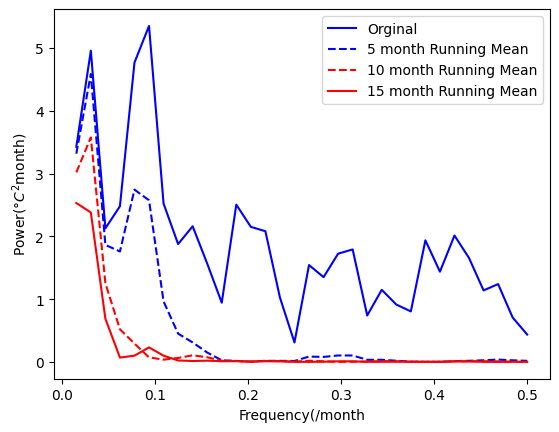

In [28]:
tokyoa_r10 = running_mean(tokyoa, 10)
tokyoa_r15 = running_mean(tokyoa, 15)

freq_tokyoa, power_tokyoa = signal.welch(tokyoa, nperseg=64)
freq_tokyoa_r5, power_tokyoa_r5 = signal.welch(tokyoa_r5, nperseg=64)
freq_tokyoa_r10, power_tokyoa_r10 = signal.welch(tokyoa_r10, nperseg=64)
freq_tokyoa_r15, power_tokyoa_r15 = signal.welch(tokyoa_r15, nperseg=64)

plt.plot(freq_tokyoa[1:], power_tokyoa[1:], 'b', label= "Orginal")
plt.plot(freq_tokyoa_r5[1:], power_tokyoa_r5[1:], 'b--', label= "5 month Running Mean")
plt.plot(freq_tokyoa_r10[1:], power_tokyoa_r10[1:], 'r--', label= "10 month Running Mean")
plt.plot(freq_tokyoa_r15[1:], power_tokyoa_r15[1:], 'r', label= "15 month Running Mean")

plt.xlabel("Frequency(/month)")
plt.ylabel("Power($°C^2 \mathrm{month}$)")
plt.legend()
# plt.show()

### 4.3 Removing Running Mean and High-pass Filter

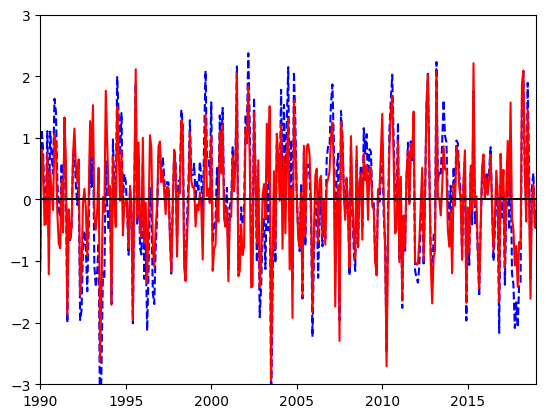

In [29]:
tokyoa_r10_rm = tokyoa -tokyoa_r10
plot_2_mon_time(tokyoa, tokyoa_r10_rm)

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1095/2579858114.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Power($°C^2 \mathrm{month}$)")


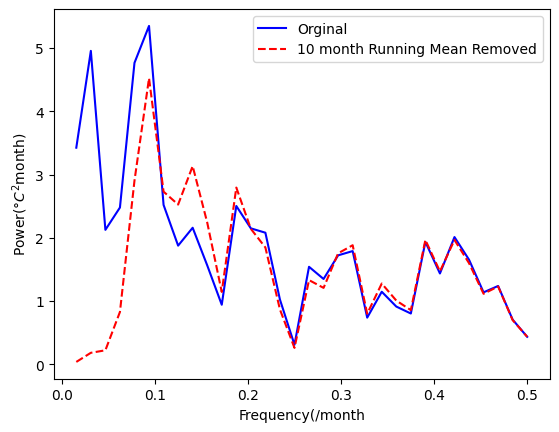

In [31]:
freq_tokyoa, power_tokyoa = signal.welch(tokyoa, nperseg=64)
freq_tokyoa_r10_rm, power_tokyoa_r10_rm = signal.welch(tokyoa_r10_rm, nperseg=64)

plt.plot(freq_tokyoa[1:], power_tokyoa[1:], 'b', label= "Orginal")
plt.plot(freq_tokyoa_r10_rm[1:], power_tokyoa_r10_rm[1:], 'r--', label= "10 month Running Mean Removed")

plt.xlabel("Frequency(/month)")
plt.ylabel("Power($°C^2 \mathrm{month}$)")
plt.legend()

### 4.4 Response Function

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1095/3831586158.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Power($°C^2 \mathrm{month}$)")


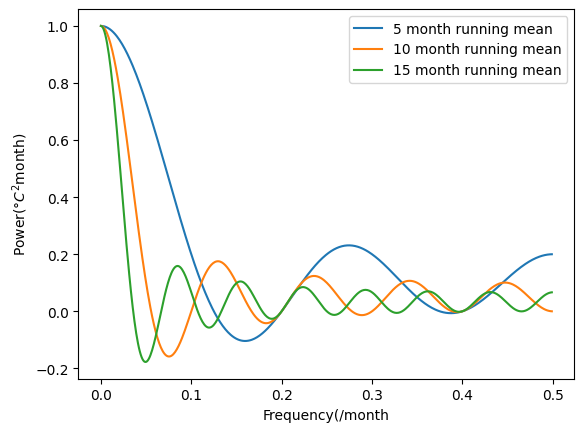

In [33]:
delta_t = 1
for wn in range(5, 20, 5):
    taps = np.full(wn, fill_value=1.0/wn)
    w,h = signal.freqz(taps)

    plt.plot(w*1/(2*np.pi*delta_t), np.real(h), label="%d month running mean" % wn)
    plt.legend()

plt.xlabel("Frequency(/month)")
plt.ylabel("Power($°C^2 \mathrm{month}$)")
plt.show()

### 4.5 Butterworth filter

In [34]:
def butterworth_lowpass(time_series, delta_t, f_cut, order):
    b, a = signal.butter(order, f_cut, btype='low', fs = 1/delta_t)

    time_series_lp = signal.filtfilt(b, a, time_series)

    return time_series_lp

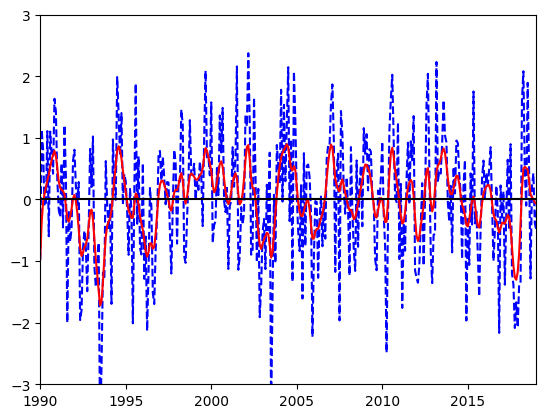

In [36]:
tokyoa_bw_low = butterworth_lowpass(tokyoa, 1, 0.08, 1)
plot_2_mon_time(tokyoa, tokyoa_bw_low)

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1095/1005682600.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Power($°C^2 \mathrm{month}$)")


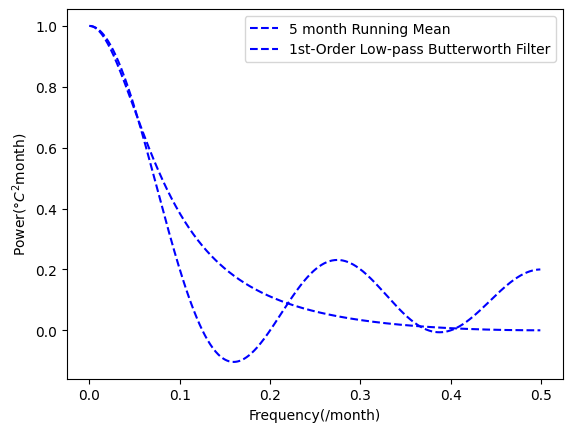

In [39]:
delta_t = 1

taps = np.full(5, fill_value=1.0/5)
w, h = signal.freqz(taps)

plt.plot(w*1/(2*np.pi*delta_t), np.real(h), 'b--', label="5 month Running Mean")

b, a = signal.butter(1, 0.08, btype='low', fs=1/delta_t)
w, h = signal.freqz(b, a)
plt.plot(w*1/(2*np.pi*delta_t), np.real(h), 'b--', label="1st-Order Low-pass Butterworth Filter")

plt.legend()
plt.xlabel("Frequency(/month)")
plt.ylabel("Power($°C^2 \mathrm{month}$)")
plt.show()